# Análise exploratória de dados

**Importando Bibliotecas**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path 

## 1. Descrição dos dados

**Dicionário**

In [6]:
data_path = Path('../data/external/dictionary.csv')
df_dictionary = pd.read_csv(data_path, sep=',') 
df_dictionary

,variavel,descricao,tipo,subtipo
0,winery,Nome da vinícola,qualitativa,nominal
1,wine,Nome do vinho,qualitativa,nominal
2,year,Ano em que as uvas foram colhidas,quantitativa,discreta
3,rating,Avaliação média dada ao vinho pelos usuários [...,quantitativa,contínua
4,num_reviews,Número de usuários que avaliaram o vinho,quantitativa,discreta
5,country,País de origem [Espanha],qualitativa,nominal
6,region,Região do vinho,qualitativa,nominal
7,price,Preço em euros [€],quantitativa,contínua
8,type,Variedade de vinho,qualitativa,nominal
9,body,"Pontuação de corpo, definida como a riqueza e ...",qualitativa,ordinal


**Importando arquivo csv**

In [8]:
df= pd.read_csv("../data/raw/wines_SPA.csv")
df.head()


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


**Transformando os nomes de colunas para pt-BR**

In [10]:
# Renomeando as colunas
df.rename(columns={
    'winery': 'vinícola',
    'wine': 'vinho',
    'year': 'ano',
    'rating': 'avaliação',
    'num_reviews': 'num_avaliações',
    'country': 'país',
    'region': 'região',
    'price': 'preço',
    'type': 'tipo',
    'body': 'corpo',
    'acidity': 'acidez'
    
}, inplace=True)


df.head(5)

,vinícola,vinho,ano,avaliação,num_avaliações,país,região,preço,tipo,corpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


**Verificando os valores da coluna país**

In [12]:
df["país"].value_counts() 

país
Espana    7500
Name: count, dtype: int64

* Observa-se que todas as linhas dessa coluna possuem o mesmo valor então ela será descartada

**Valores únicos 'espana' - removida**

In [15]:
df = df.drop(columns=['país'])
df.head(5)

,vinícola,vinho,ano,avaliação,num_avaliações,região,preço,tipo,corpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


**Informações sobre o dataset**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vinícola        7500 non-null   object 
 1   vinho           7500 non-null   object 
 2   ano             7498 non-null   object 
 3   avaliação       7500 non-null   float64
 4   num_avaliações  7500 non-null   int64  
 5   região          7500 non-null   object 
 6   preço           7500 non-null   float64
 7   tipo            6955 non-null   object 
 8   corpo           6331 non-null   float64
 9   acidez          6331 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 586.1+ KB


* Ao todo são 10 colunas e 7500 linhas. É possível observar a presença de nulos em ano, tipo, corpo e acidez pois essas colunas possuem números de linhas inferiores a 7500

**Contagem de valores nulos por coluna**

In [20]:
print(df.isnull().sum()) 

vinícola             0
vinho                0
ano                  2
avaliação            0
num_avaliações       0
região               0
preço                0
tipo               545
corpo             1169
acidez            1169
dtype: int64


**Verificando valores únicos em Ano**

* Ano está como [object] mas porque será? Qual valor string há em ano?

In [23]:
df['ano'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

* Se observa o N.V.(Non Vintage), que significa vinho sem safra produzidos a partir de uvas colhidas em diferentes anos. Dessa forma escolhemos observar quantos dados possuem esse valor porém não vamos alterar/apagar esse dado 

**Verificando a quantidade de vinhos sem safra**

In [26]:
print((df == 'N.V.').sum())  

vinícola            0
vinho               0
ano               288
avaliação           0
num_avaliações      0
região              0
preço               0
tipo                0
corpo               0
acidez              0
dtype: int64


**Verificando Duplicatas**

In [28]:
duplicatas = df.duplicated()
duplicatas

0       False
1       False
2       False
3       False
4       False
        ...  
7495     True
7496     True
7497     True
7498     True
7499     True
Length: 7500, dtype: bool

* Seria interessante observar essas duplicatas e tratar 

**Convertendo o tipo de preço para float e padronizando as casas decimais**

In [31]:
df['preço'] = df['preço'].astype(float)# Convertendo para float
df['preço'] = df['preço'].round(2)# Padronizando com duas casas decimais

**Convertendo os tipos de corpo e acidez para inteiro**

* Seria interessante tentar tratar os NAN para não precisar converter eles para valor 0

In [34]:
df['corpo'] = df['corpo'].fillna(0).astype(int)
df['acidez'] = df['acidez'].fillna(0).astype(int)

In [35]:
df.head()

,vinícola,vinho,ano,avaliação,num_avaliações,região,preço,tipo,corpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5,3
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4,2
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5,3
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5,3
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5,3


## 2. Perguntas de partida e hipóteses

1 -  Top 3 vinhos mais baratos e mais caros e suas respectivas vinícolas <br>
2 - Correlação entre as variáveis. Quais as maiores e menores? <br>
3 - Quais são os melhores anos de vinhos avaliados? São os mais antigos? <br>
4 - O tipo de vinho afeta a avaliação média ou o preço? <br>
5 - A acidez ou o corpo dos vinhos influenciam a avaliação média dos usuários?   
6 -  Há alguma relação entre a avaliação (rating) e o preço (price) médio dos vinhos?<br>


In [39]:
print("Tabela de características das variáveis qualitativas:\n")
df.describe(include=['object'])

Tabela de características das variáveis qualitativas:



,vinícola,vinho,ano,região,tipo
count,7500,7500,7498,7500,6955
unique,480,847,71,76,21
top,Contino,Reserva,2011,Rioja,Rioja Red
freq,457,467,1190,2440,2357


Observações: Dados categóricos
Aqui é possível observar os valores únicos e mais frequentes para cada coluna 
O Ano está em categórico pois possui valores não numéricos referentes aos vinhos com anos não identificados

In [41]:
df.describe().round(2)

,avaliação,num_avaliações,preço,corpo,acidez
count,7500.00,7500.00,7500.00,7500.00,7500.00
mean,4.25,451.11,60.10,3.51,2.49
std,0.12,723.00,150.36,1.60,1.09
min,4.20,25.00,4.99,0.00,0.00
25%,4.20,389.00,18.90,4.00,3.00
50%,4.20,404.00,28.53,4.00,3.00
75%,4.20,415.00,51.35,4.00,3.00
max,4.90,32624.00,3119.08,5.00,3.00


A média das avaliações é 4.25, com uma leve dispersão (desvio padrão de 0.12), indicando uma tendência positiva nas notas dos vinhos. O número de avaliações varia bastante, com uma média de 451 avaliações, mas com uma alta variabilidade (desvio padrão de 723), sugerindo que alguns vinhos têm um grande número de avaliações enquanto outros têm bem menos. O preço médio dos vinhos é de 60.10, com uma grande variação (máximo de 3119.08 e mínimo de 4.99), refletindo a diversidade de preços. Em relação às características sensoriais, como corpo e acidez, a média para o corpo é 3.51 e para a acidez é 2.49, com a maioria dos vinhos apresentando corpo entre 3 e 5, e acidez variando de 0 a 3, evidenciando um padrão mais concentrado nas avaliações dessas características. O intervalo interquartil para preço, corpo e acidez mostra uma concentração maior dos vinhos com valores mais baixos dessas variáveis, enquanto os valores extremos indicam a presença de vinhos de preço elevado ou com características sensoriais atípicas.

**Top 3 vinhos mais baratos e mais caros e suas respctivas vinícolas**

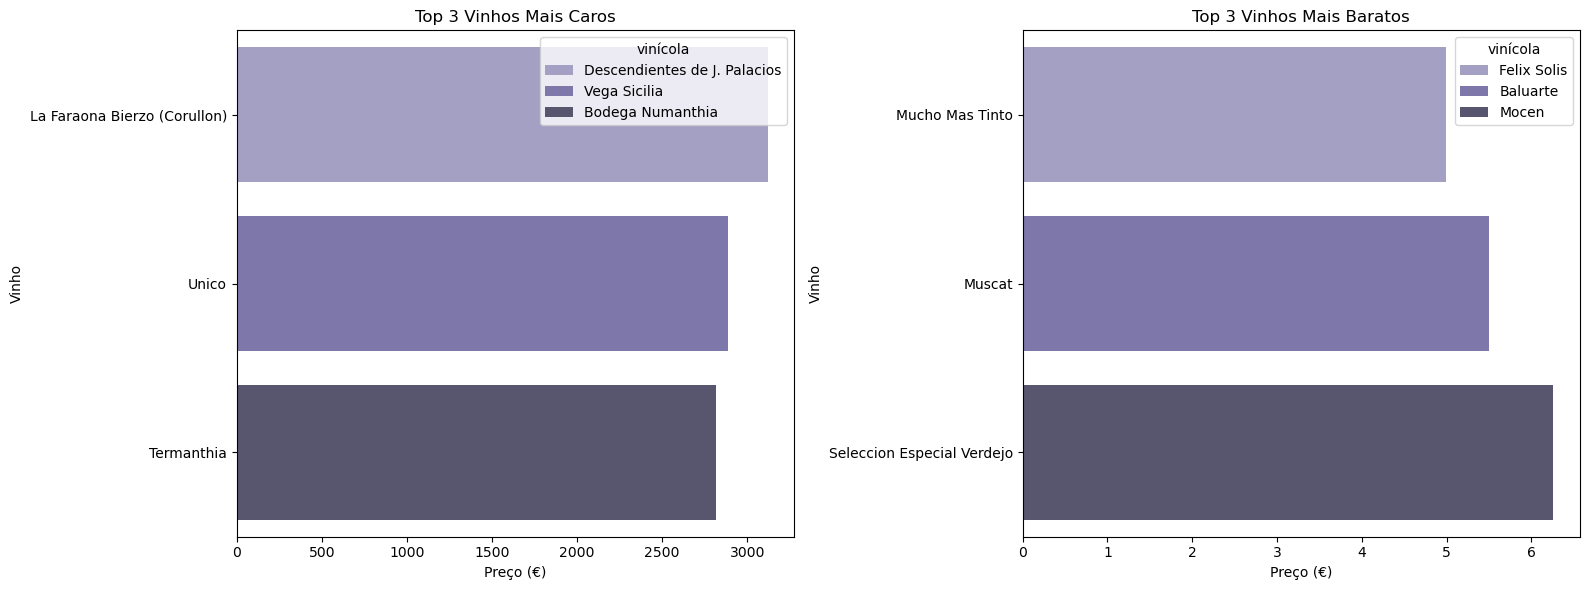

In [489]:
top_3_caros = df.nlargest(3, 'preço')[['vinho', 'preço', 'vinícola']]
top_3_baratos = df.nsmallest(3, 'preço')[['vinho', 'preço', 'vinícola']]

plt.figure(figsize=(16, 6))

# Gráfico dos vinhos mais caros
plt.subplot(1, 2, 1)
sns.barplot(x='preço', y='vinho', data=top_3_caros, hue='vinícola', palette='Purples_d', dodge=False)
plt.title('Top 3 Vinhos Mais Caros')
plt.xlabel('Preço (€)')
plt.ylabel('Vinho')

# Gráfico dos vinhos mais baratos
plt.subplot(1, 2, 2)
sns.barplot(x='preço', y='vinho', data=top_3_baratos, hue='vinícola', palette='Purples_d', dodge=False)
plt.title('Top 3 Vinhos Mais Baratos')
plt.xlabel('Preço (€)')
plt.ylabel('Vinho')

plt.tight_layout()
plt.show()

Os gráficos mostram os top 3 vinhos mais caros e vinhos mais baratos. É interessante perceber a discrepancia dos valores. Duas das vinícolas com vinhos mais caros ficam localizadas no Noroeste da espanha, uma região montanhosa, apenas Mocén – Vinícolas localizada na mesma região, possui um preço menor. No Centro-Norte temos Felix Solis e Baluarte que são vinícolas presentes nas regiões mais ao sul e centro, com menor altitude em comparação ao grupo anterior.

**O tipo de vinho afeta a avaliação média?**

In [46]:
df['tipo'].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

Separação dos vinhos quanto ao tipo: 

**Vinhos Tintos:** Toro Red, Tempranillo,Ribera Del Duero Red, Red, Sherry,Priorat Red,Rioja Red,Grenache,Syrah,Monastrell,Mencia,Montsant Red,Cabernet Sauvignon.<br>

**Vinhos Brancos:** Rioja White, Verdejo, Albarino, Chardonnay, Sauvignon Blanc.<br>

**Vinhos Espumantes:** Cava, Sparkling.<br>

**Vinho Indefinido (nan):** Sem classificação

In [159]:
df["tipo"].value_counts()

tipo
Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Pedro Ximenez             35
Grenache                  35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: count, dtype: int64

**Criando as categorias e a função para categorias de vinhos**

In [ ]:
categorias = {
    'Vinhos Tintos': ['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Red', 'Priorat Red', 
                      'Rioja Red', 'Grenache', 'Syrah', 'Monastrell', 'Mencia', 'Montsant Red', 
                      'Cabernet Sauvignon'],
    'Vinhos Brancos': ['Rioja White', 'Verdejo', 'Albarino', 'Chardonnay', 'Sauvignon Blanc'],
    'Vinhos Espumantes': ['Cava', 'Sparkling'],
    'Vinhos Fortificados': ['Sherry', 'Pedro Ximenez'],
    'Vinho Indefinido': [None]
}

# Função para classificar o tipo de vinho
def classificar_vinho(vinho):
    for categoria, vinhos_categoria in categorias.items():
        if vinho in vinhos_categoria:
            return categoria
    return 'Outros'

In [177]:
contagem_por_categoria = df['Categoria'].value_counts()
contagem_por_categoria

Categoria
Vinhos Tintos          6220
Outros                  545
Vinhos Brancos          388
Vinhos Fortificados     309
Vinhos Espumantes        38
Name: count, dtype: int64

É importante perceber que os valores para os diferentes grupos de vinhos está muito descrepante. O vinho tinto tem uma boa representatividade mas outros vinhos como espumante tem número reduzido. Então as avaliações ocorreram dentro dos grupos e não entre eles. Ao final será comparado os maiores e menores valores de avaliação e preço dos grupos. 

**A média de preço e avaliações do vinho tinto**

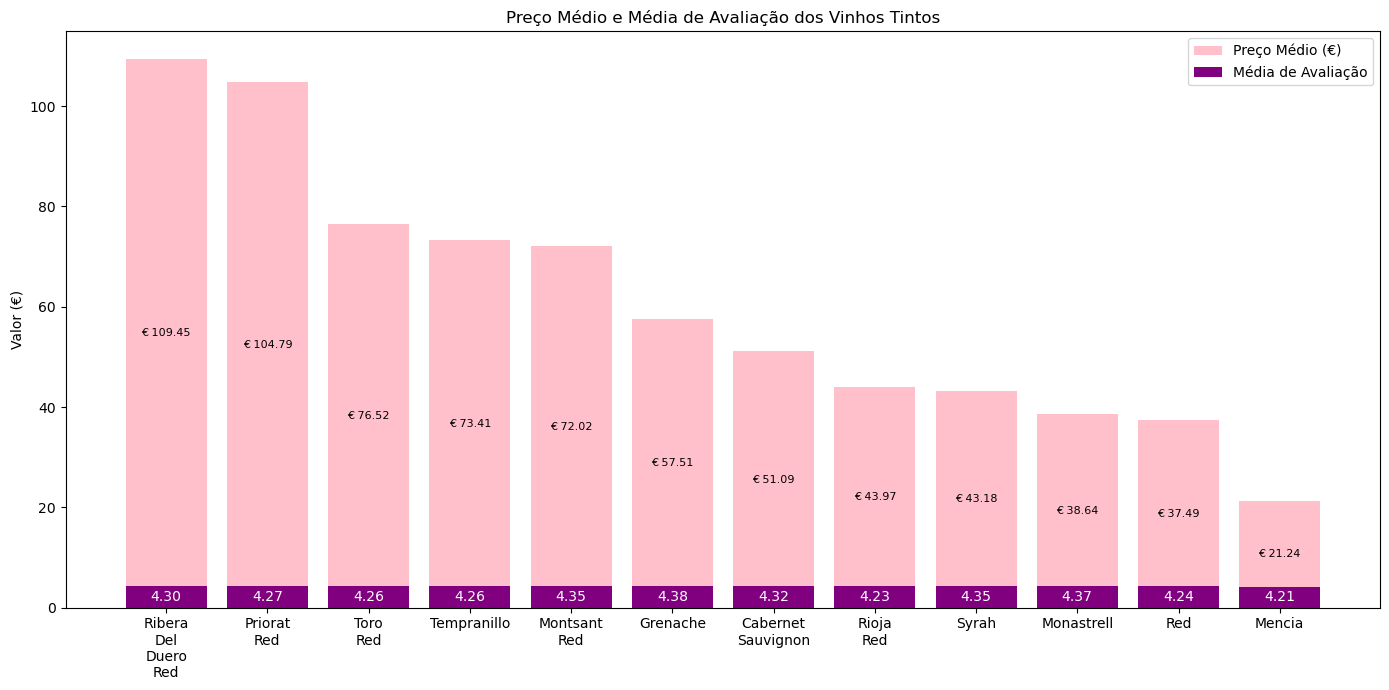

In [351]:
vinhos_tintos = df[df['Categoria'] == 'Vinhos Tintos']

media_avaliacao_tintos = vinhos_tintos.groupby('tipo')['avaliação'].mean()
media_preco_tintos = vinhos_tintos.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_tintos.sort_values(ascending=False)

media_avaliacao_tintos = media_avaliacao_tintos[ordenado_por_preco.index]
media_preco_tintos = media_preco_tintos[ordenado_por_preco.index]

bar_width = 0.8 

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(14, 7))  

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_tintos))

bars1 = ax1.bar(index, media_preco_tintos, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index, media_avaliacao_tintos, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_tintos):
    ax1.text(i, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8)  # Fonte menor para o preço

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_tintos):
    ax1.text(i, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Tintos')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos vinhos na horizontal, e quebrando as linhas
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_tintos.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos tintos o Ribera Del Duero Red é a variedade e logo após ele vem o Priorat Red, os outros vinhos estão abaixo de 80 euros. O vinho tinto mais bem avaliado (Grenache) possui um valor de vinho mediano comparado aos vinhos mais baratos e mais caros. Não existe um padrão entre avaliação e preço porém a menor avaliaçãoa qui está associada ao vinho de menor preço. O Monastrell dentre os vinhos tintos parece ser o que melhor apresenta custo benefício devido a seu preço relativamente baixo e avaliação relativamente alta.
* A diferença entre o vinho mais caro e mais barato é de: 88,21 euros
* A diferença entre o melhor avaliado (Grenache) e o pior avaliado (Mencia) é de: 0.17

**A média de preço e avaliações do vinho branco**

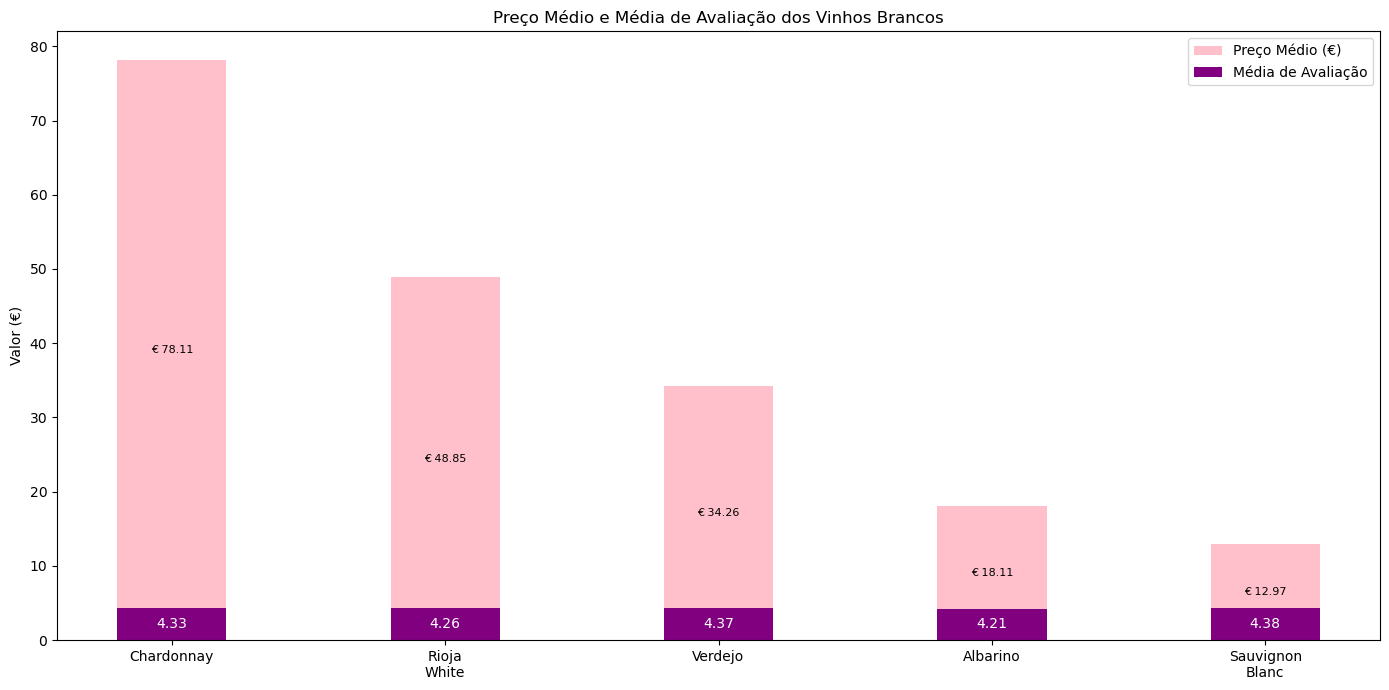

In [263]:
vinhos_brancos = df[df['Categoria'] == 'Vinhos Brancos']

media_avaliacao_brancos = vinhos_brancos.groupby('tipo')['avaliação'].mean()
media_preco_brancos = vinhos_brancos.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_brancos.sort_values(ascending=False)

media_avaliacao_brancos = media_avaliacao_brancos[ordenado_por_preco.index]
media_preco_brancos = media_preco_brancos[ordenado_por_preco.index]

bar_width = 0.4  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_brancos))
bars1 = ax1.bar(index, media_preco_brancos, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index, media_avaliacao_brancos, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_brancos):
    ax1.text(i, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8) 

# Adicionando os valores dentro da barra de avaliação
for i, v in enumerate(media_avaliacao_brancos):
    ax1.text(i, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')


ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Brancos')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos vinhos na horizontal, e quebrando as linhas
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_brancos.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos brancos o Chardonnay é a variedade mais cara após ele outros vinhos estão abaixo de 50 euros. Aqui as avaliações novamente não acompanham a risca os preços pois o vinho branco Sauvignon Blanc possui o menor preço dentre os vinhos brancos e em contraponto a maior avaliação superando o vinho mais branco mais caro, sendo ele um ótimo candidato em relação a custo e benefício. 
* A diferença entre o vinho mais caro e mais barato é de: 65.14 euros
* A diferença entre o melhor avaliado (Sauvignon Blanc) e o pior avaliado (Albarino) é de: 0.17

**A média de preço e avaliações do vinho espumante**

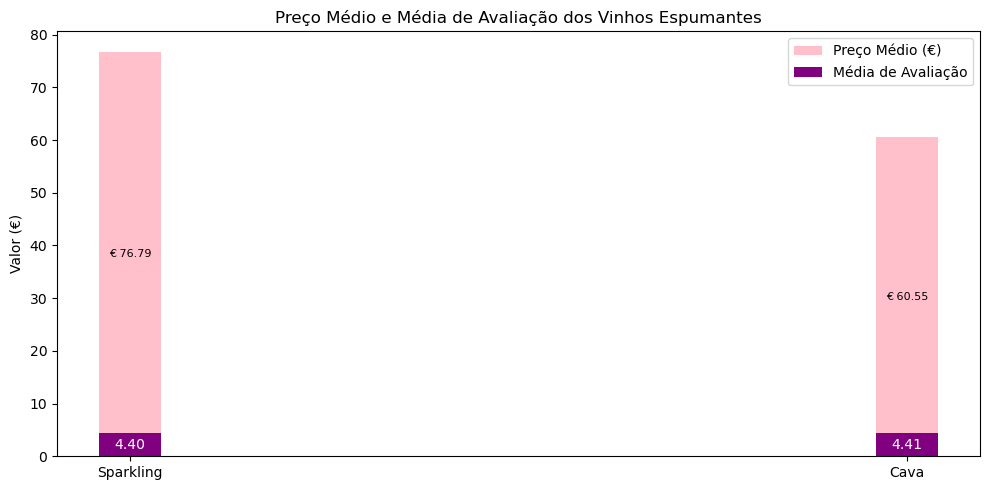

In [446]:
vinhos_espumantes = df[df['Categoria'] == 'Vinhos Espumantes']

media_avaliacao_espumantes = vinhos_espumantes.groupby('tipo')['avaliação'].mean()
media_preco_espumantes = vinhos_espumantes.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_espumantes.sort_values(ascending=False)

media_avaliacao_espumantes = media_avaliacao_espumantes[ordenado_por_preco.index]
media_preco_espumantes = media_preco_espumantes[ordenado_por_preco.index]

bar_width = 0.08  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_espumantes))

bars1 = ax1.bar(index, media_preco_espumantes, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index, media_avaliacao_espumantes, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_espumantes):
    ax1.text(i, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_espumantes):
    ax1.text(i, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Espumantes')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos vinhos na horizontal, com quebra de linha se necessário
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_espumantes.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos espumantes temos duas marcas que possuem valores próximos e avaliações muito aproximadas  
* A diferença entre o vinho mais caro e mais barato é de: 16.24 euros
* A diferença entre as avalaiações é de: 0.01

**A média de preço e avaliações do vinho fortificado**

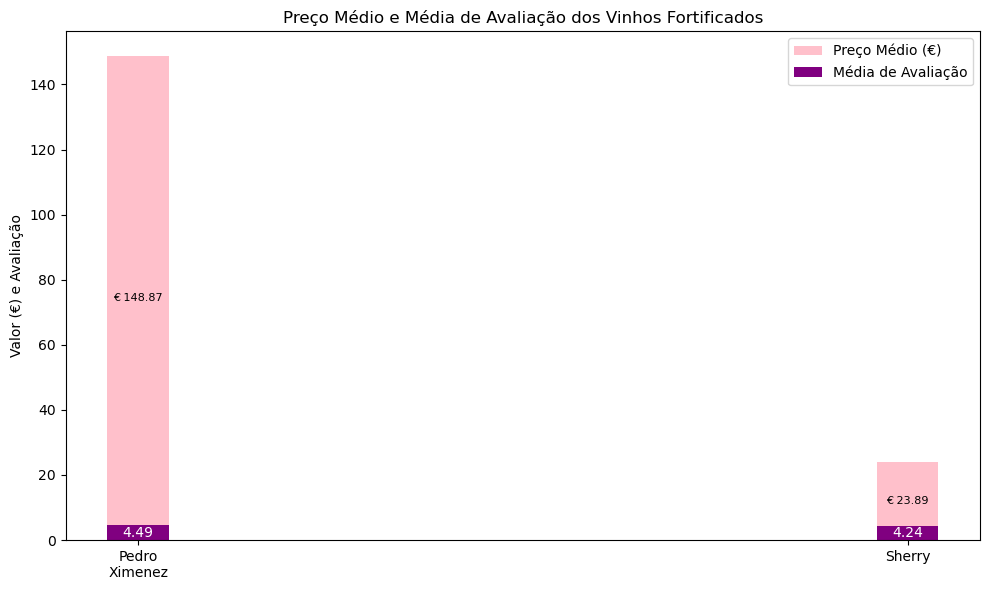

In [440]:
vinhos_fortificados = df[df['Categoria'] == 'Vinhos Fortificados']

media_avaliacao_fortificados = vinhos_fortificados.groupby('tipo')['avaliação'].mean()
media_preco_fortificados = vinhos_fortificados.groupby('tipo')['preço'].mean()

ordenado_por_preco_fortificados = media_preco_fortificados.sort_values(ascending=False)

media_avaliacao_fortificados = media_avaliacao_fortificados[ordenado_por_preco_fortificados.index]
media_preco_fortificados = media_preco_fortificados[ordenado_por_preco_fortificados.index]

bar_width = 0.08  

fig, ax1 = plt.subplots(figsize=(10, 6)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_fortificados))

bars1 = ax1.bar(index, media_preco_fortificados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index, media_avaliacao_fortificados, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_fortificados):
    ax1.text(i, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_fortificados):
    ax1.text(i, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Fortificados')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€) e Avaliação')

# Colocando os rótulos dos vinhos na horizontal, com quebra de linha se necessário
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_fortificados.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos fortificados temos duas marcas que possuem valores muito distantes e avaliações muito diferentes também.  
* A diferença entre o vinho mais caro e mais barato é de: 124.98 euros
* A diferença entre as avalaiações é de: 0.25

**Análise de preço e avaliação dos vinhos mais caros**

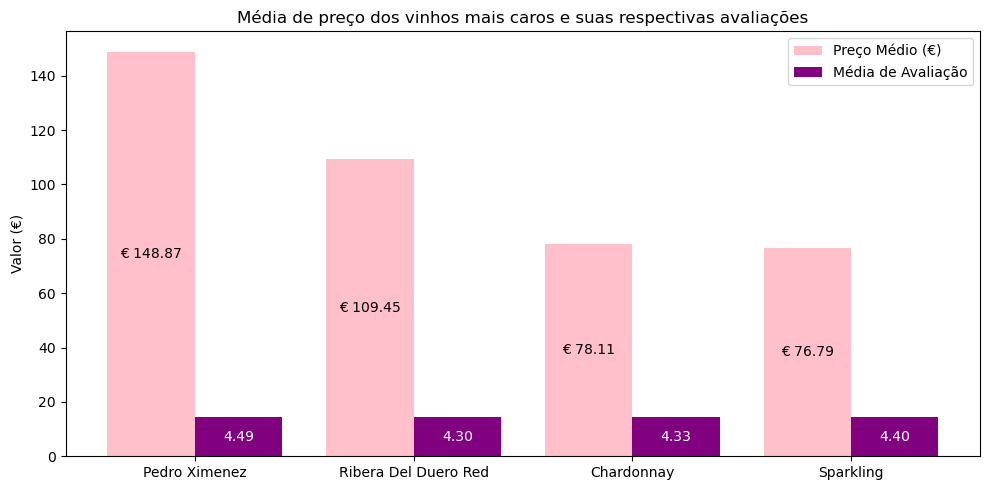

In [399]:
vinhos_selecionados = df[df['tipo'].isin(['Ribera Del Duero Red', 'Chardonnay', 'Sparkling', 'Pedro Ximenez'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_preco.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_preco.index]

bar_width = 0.4 
padding = 10  

fig, ax1 = plt.subplots(figsize=(10, 5))  # Aumentando a largura da figura

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Média de preço dos vinhos mais caros e suas respectivas avaliações')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

# Adicionando as categorias de vinhos no gráfico
for i, wine_type in enumerate(media_avaliacao_selecionados.index):
    ax1.text(i, -5, f'{df[df["tipo"] == wine_type]["categoria"].iloc[0]}', ha='center', va='center', fontsize=9, color='black')

ax1.legend()

plt.tight_layout()
plt.show()



Os vinhos mais caros estão acima dos 70 euros. Possuem avaliações consideravelmente alta a partir da casa dos 4.30. Com o vinho (Pedro Ximenez- Vinho fortificado)sendo o maior em preço e em avaliações. 

**Análise de preço e avaliação dos vinhos mais baratos**

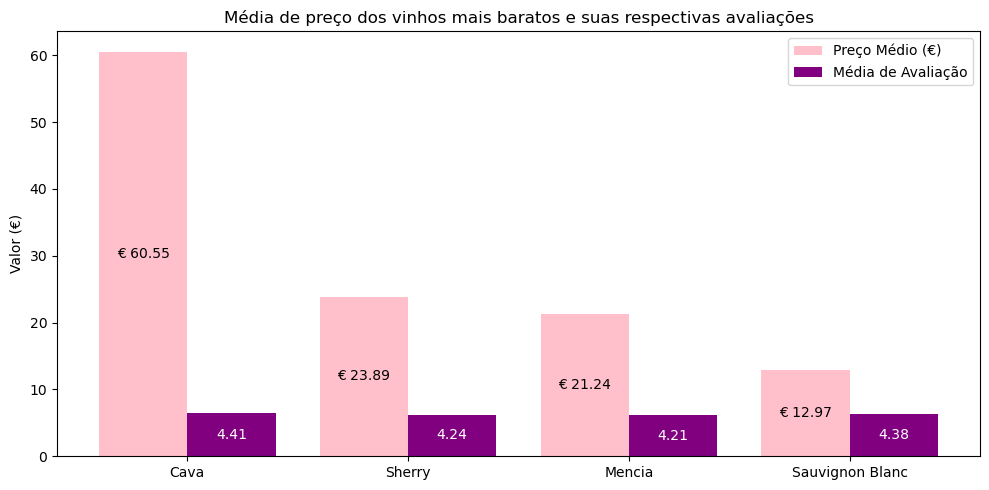

In [470]:
vinhos_selecionados = df[df['tipo'].isin(['Mencia', 'Sauvignon Blanc', 'Cava', 'Sherry'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_preco.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_preco.index]

bar_width = 0.4  
padding = 2  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Média de preço dos vinhos mais baratos e suas respectivas avaliações')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos tipos de vinhos
ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()



Dentre os vinhos mais baratos o (Cava - vinho espumante) possui o maior preço e maior avaliação, seguido de (Sauvignon Blac -vinho branco) que possui o menor preço e uma avaliação apenas 0.03 do Cava. Os outros dois vinhos (Sherry- Vinho fortificado) e (Mencia- Vinho Tinto), possuem valores muito próximos tanto no preço quanto na avaliação 

**maiores medias entre os vinhos analisados**

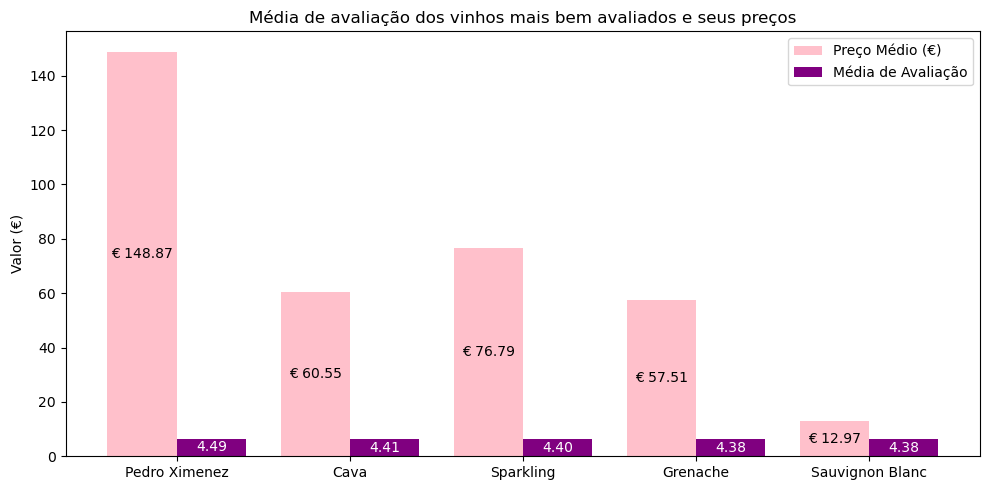

In [408]:
vinhos_selecionados = df[df['tipo'].isin(['Grenache', 'Sauvignon Blanc', 'Sparkling', 'Cava','Pedro Ximenez'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_avaliacao = media_avaliacao_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_avaliacao.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_avaliacao.index]

bar_width = 0.4 
padding = 2  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')


ax1.set_title('Média de avaliação dos vinhos mais bem avaliados e seus preços')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos tipos de vinhos
ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Dentre os vinhos com maiores avaliações há uma variedade de preços com dois grandes extremos (Pedro Ximenez- Vinho fortificado) e (Sauvignon Blanc- Vinho branco). Porém a maior avaliação média está voltada ao vinho de maior preço médio. O (Cava e Sparkling - aúnicos representantes de vinhos espumantes), estão no grupos dos mais bem avaliados devido a proximidade das avaliações. Ao todo não há avaliações menores de 4.38. 

**menores medias entre os vinhos analisados**

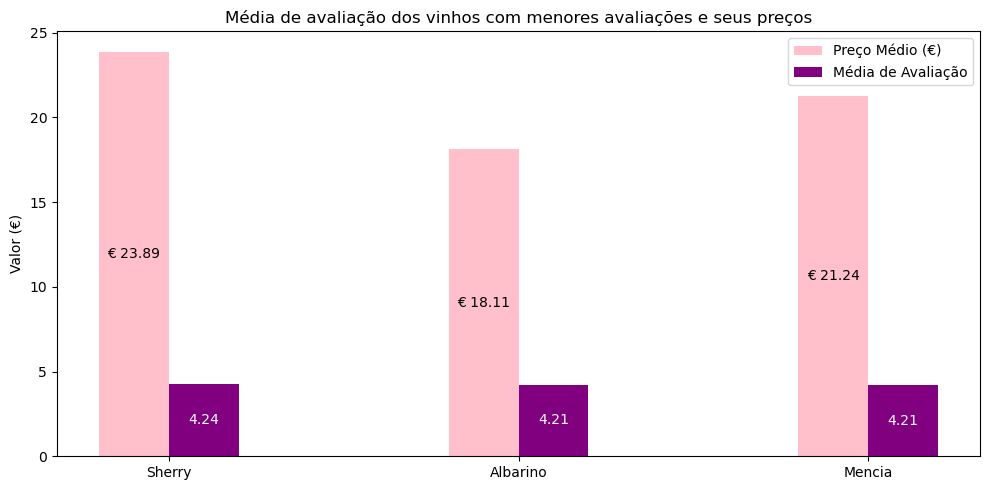

In [442]:
vinhos_selecionados = df[df['tipo'].isin(['Mencia', 'Albarino', 'Sherry'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_avaliacao = media_avaliacao_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_avaliacao.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_avaliacao.index]


bar_width = 0.2  


# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Média de avaliação dos vinhos com menores avaliações e seus preços')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos tipos de vinhos
ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Dentre os vinhos com menores avaliações médias estão (Albarino - vinho branco) e (Mencia - vinho tinto) com 4.21 seguido de (Sherry - vinho fortificante) com 4.24. Aqui nesse grupo é possível notar uma média de preço muito próxima que não supera os 25 euros e avaliações na casa dos 4.20. 



## 3. Insights